In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [ ]:
df = pd.read_csv('/content/student_habits_performance.csv')

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(1000, 16)

In [ ]:
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


In [ ]:
df["parental_education_level"].fillna('Unknown', inplace=True)
df["parental_education_level"].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167
Unknown,91


In [ ]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [ ]:
df.drop("student_id",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [ ]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return filtered_df

filtered_df = remove_outliers_iqr(df, 'exam_score')


In [ ]:
filtered_df

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


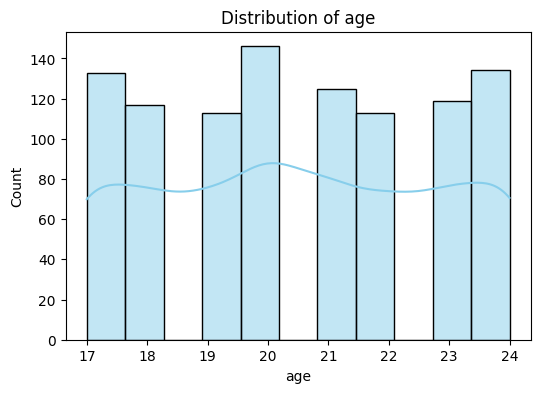

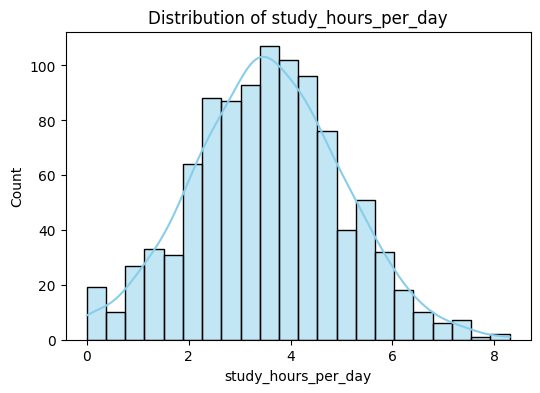

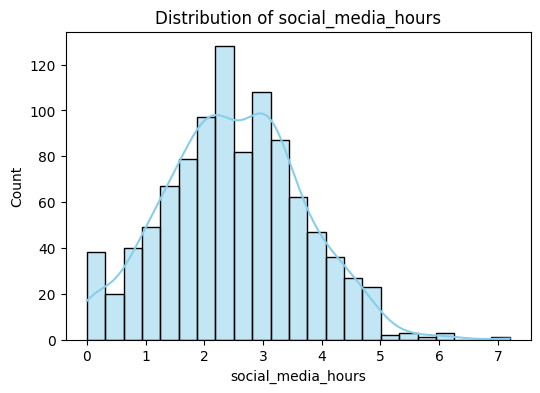

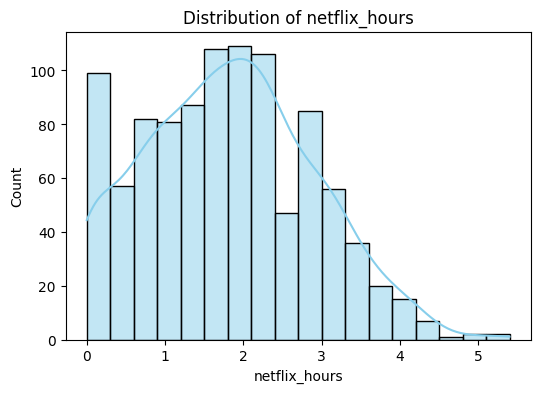

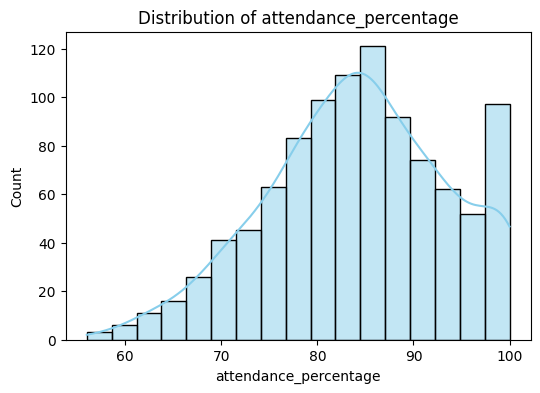

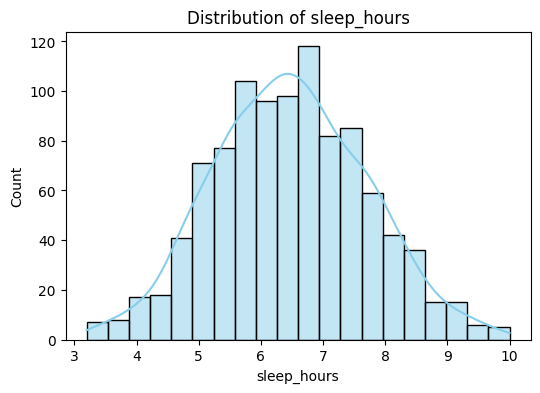

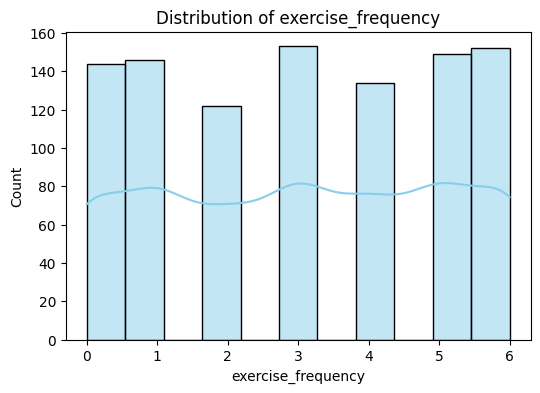

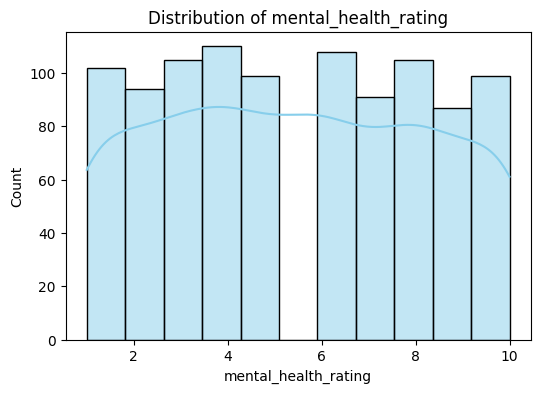

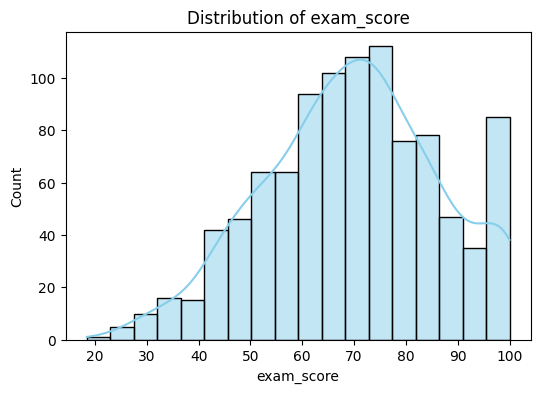

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours',
                  'netflix_hours', 'attendance_percentage', 'sleep_hours',
                  'exercise_frequency', 'mental_health_rating', 'exam_score']

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()


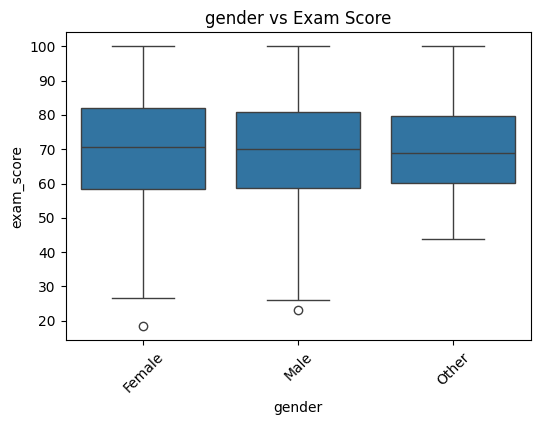

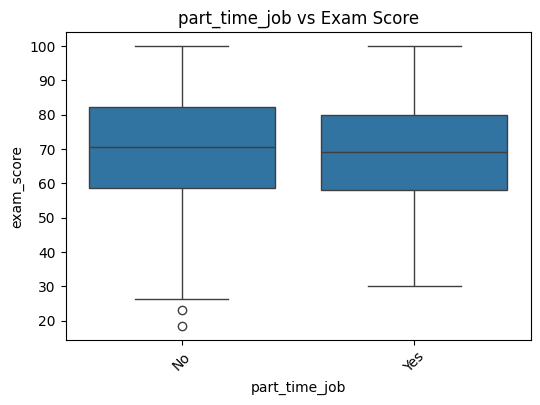

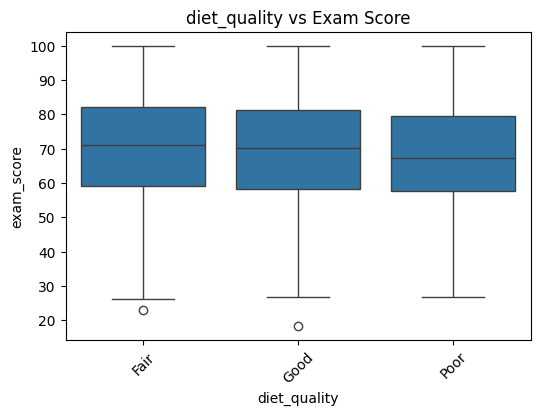

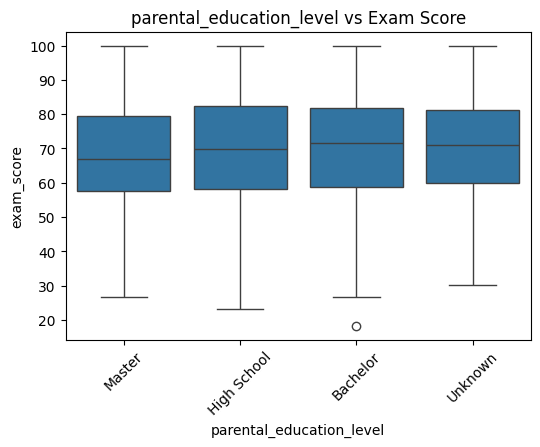

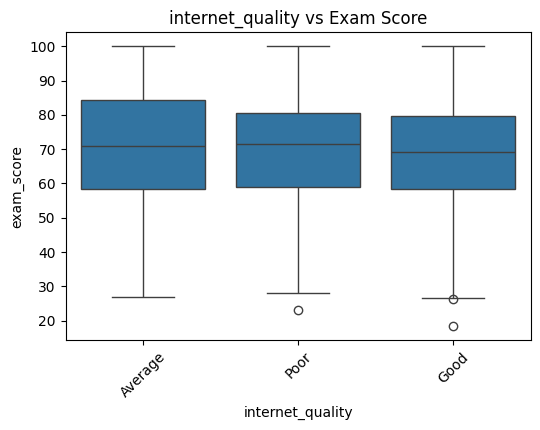

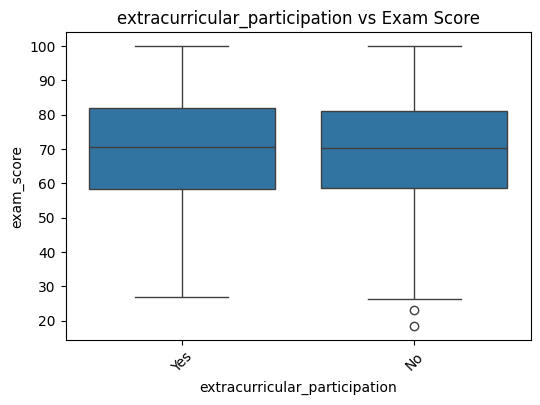

In [ ]:
categorical_cols = ['gender', 'part_time_job', 'diet_quality',
                    'parental_education_level', 'internet_quality',
                    'extracurricular_participation']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col, y='exam_score')
    plt.title(f"{col} vs Exam Score")
    plt.xticks(rotation=45)
    plt.show()


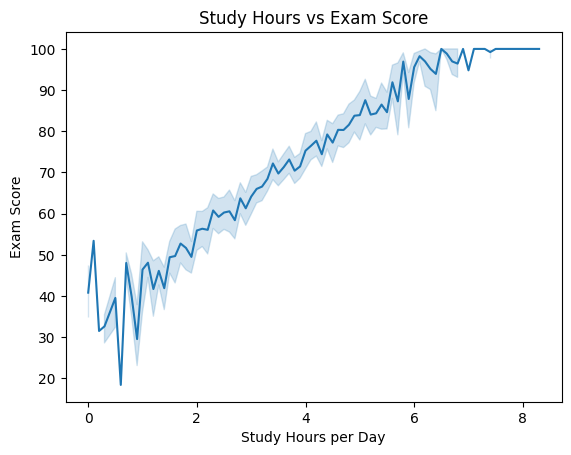

In [ ]:
sns.lineplot(data=df, x='study_hours_per_day', y='exam_score')
plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.show()

In [ ]:
X = filtered_df.drop('exam_score', axis=1)
y = filtered_df['exam_score']


In [ ]:
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(exclude=['object']).columns

In [ ]:

list(numerical_columns)

['age',
 'study_hours_per_day',
 'social_media_hours',
 'netflix_hours',
 'attendance_percentage',
 'sleep_hours',
 'exercise_frequency',
 'mental_health_rating']

In [ ]:
list(categorical_columns)

['gender',
 'part_time_job',
 'diet_quality',
 'parental_education_level',
 'internet_quality',
 'extracurricular_participation']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(), categorical_columns),
        ('num', StandardScaler(), numerical_columns)
    ])

In [ ]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression() )
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OrdinalEncoder(),
                                                  Index(['gender', 'part_time_job', 'diet_quality', 'parental_education_level',
       'internet_quality', 'extracurricular_participation'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 4.527524763162216
R²: 0.8744331798073899


In [ ]:
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [ ]:
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib


@st.cache_data
def load_model():
    return joblib.load("/content/pipeline.pkl")

model = load_model()


def generate_recommendations(student_data, predicted_score):
    suggestions = []


    if student_data['study_hours_per_day'] < 2:
        suggestions.append("Increase study time to at least 2 hours daily with Pomodoro technique.")
    if student_data['sleep_hours'] < 7:
        suggestions.append("Improve sleep to 7-8 hours by setting a fixed bedtime.")
    if student_data['social_media_hours'] > 2:
        suggestions.append("Limit social media to 1.5 hours daily using app blockers.")
    if student_data['netflix_hours'] > 2:
        suggestions.append("Cut down Netflix time to 1 hour and take regular study breaks.")
    if student_data['diet_quality'] == 'Poor':
        suggestions.append("Add a nutritious breakfast and include fruits daily.")
    if student_data['exercise_frequency'] < 2:
        suggestions.append("Try to exercise at least 3 times a week for better focus.")
    if student_data['attendance_percentage'] < 80:
        suggestions.append("Improve attendance to 90%+ by regular class participation.")
    if student_data['mental_health_rating'] < 5:
        suggestions.append("Practice journaling and consider weekly mentor check-ins.")


    if predicted_score < 50:
        suggestions.insert(0, f" Predicted exam score is low ({predicted_score:.1f}). Immediate action recommended.")
    elif predicted_score < 75:
        suggestions.insert(0, f" Predicted exam score is moderate ({predicted_score:.1f}). There is room for improvement.")
    elif predicted_score < 90:
        suggestions.insert(0, f" Predicted exam score is good ({predicted_score:.1f}). You can still optimize some areas.")
    else:
        suggestions.insert(0, f" Excellent predicted score ({predicted_score:.1f})! Keep doing what's working.")


    if predicted_score >= 90:
        return suggestions[:6]
    return suggestions


# Streamlit UI
st.set_page_config(page_title="Exam Score Predictor", layout="centered")
st.title("🎓 Personalized Exam Score Predictor & Roadmap")
st.markdown("Enter your daily habits and lifestyle data to estimate your exam score and get custom recommendations.")

# Input fields
age = st.number_input("Age", min_value=1, max_value=100)
study_hours_per_day = st.slider("Study Hours per Day", 0, 24, 8)
social_media_hours = st.slider("Social Media Hours per Day", 0, 24, 6)
netflix_hours = st.slider("Netflix Hours per Day", 0, 24, 4)
attendance_percentage = st.slider("Attendance Percentage", 0, 100, 90, 1)
sleep_hours = st.slider("Sleep Hours per Day", 0.0, 12.0, 7.0, 0.1)
exercise_frequency = st.slider("Exercise Frequency (times per week)", 0, 7, 3)
mental_health_rating = st.slider("Mental Health Rating (1-10)", 1, 10, 7)
gender = st.selectbox("Gender", ['Female', 'Male', 'Other'])
part_time_job = st.selectbox("Part-time Job?", ['No', 'Yes'])
diet_quality = st.selectbox("Diet Quality", ['Fair', 'Good', 'Poor'])
parental_education_level = st.selectbox("Parental Education Level", ['Master', 'High School', 'Bachelor', 'Unknown'])
internet_quality = st.selectbox("Internet Quality", ['Average', 'Poor', 'Good'])
extracurricular_participation = st.selectbox("Extracurricular Participation?", ['No', 'Yes'])

# Prediction trigger
if st.button(" Predict Exam Score & Get Recommendations"):

    # Create input DataFrame
    input_df = pd.DataFrame({
        'age': [age],
        'study_hours_per_day': [study_hours_per_day],
        'social_media_hours': [social_media_hours],
        'netflix_hours': [netflix_hours],
        'attendance_percentage': [attendance_percentage],
        'sleep_hours': [sleep_hours],
        'exercise_frequency': [exercise_frequency],
        'mental_health_rating': [mental_health_rating],
        'gender': [gender],
        'part_time_job': [part_time_job],
        'diet_quality': [diet_quality],
        'parental_education_level': [parental_education_level],
        'internet_quality': [internet_quality],
        'extracurricular_participation': [extracurricular_participation],
    })


    pred_score = model.predict(input_df)[0]
    pred_score = min(pred_score, 100)

    # Graphical feedback - progress bar
    st.subheader("Predicted Exam Score")
    st.progress(int(pred_score))  # visual progress bar
    st.success(f"Your predicted exam score is **{pred_score:.1f}** out of 100")

    # Display recommendations
    recs = generate_recommendations(input_df.iloc[0], pred_score)
    st.markdown("### 💡 Personalized Recommendations")
    for rec in recs:
        st.write(f"- {rec}")



Overwriting app.py


In [ ]:
!pip install pyngrok
from pyngrok import ngrok
import subprocess
import time

In [ ]:
proc = subprocess.Popen(['streamlit', 'run', '/content/app.py'])

In [ ]:
!ngrok config add-authtoken 2xN3gThkET4hAxWiNZSzBd0KBlE_5aNAbUxfmEE8vJ9XpfU62

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install --upgrade pyngrok

In [ ]:
public_url = ngrok.connect(8501)


Public URL: NgrokTunnel: "https://f9b4-34-168-178-142.ngrok-free.app" -> "http://localhost:8501"
